# Housing Price Prediction: Advanced Regression

# Data Preprocessing

Import train and test data, then combine into a single dataframe to begin preprocessing.

In [0]:
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/Ryan-Earl/prices-advanced-regression/master/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Ryan-Earl/prices-advanced-regression/master/test.csv")
test_index = test['Id']
price = train['SalePrice']
df = train.drop(["SalePrice"], axis=1).append(test, ignore_index=True, sort=True)

## Dealing with Missing Values

**To Do: The documentation for each variable in the .txt file lists what nan values mean. instead of imputing by mean we should try to follow those standards**

drop columns with over 60% of values missing and print the remaining columns with missing values

In [0]:
import numpy as np

df = df.replace([' ','NULL'], np.nan).dropna(thresh=df.shape[0]*.6, how='all', axis=1)
null_val = df.isnull().sum()
print(null_val[null_val > 0])

BsmtCond         82
BsmtExposure     82
BsmtFinSF1        1
BsmtFinSF2        1
BsmtFinType1     79
BsmtFinType2     80
BsmtFullBath      2
BsmtHalfBath      2
BsmtQual         81
BsmtUnfSF         1
Electrical        1
Exterior1st       1
Exterior2nd       1
Functional        2
GarageArea        1
GarageCars        1
GarageCond      159
GarageFinish    159
GarageQual      159
GarageType      157
GarageYrBlt     159
KitchenQual       1
LotFrontage     486
MSZoning          4
MasVnrArea       23
MasVnrType       24
SaleType          1
TotalBsmtSF       1
Utilities         2
dtype: int64


There are a multitude of missing values across basement columns. The easy way to deal with these columns would be to simply impute missing values with some measure of central tendency for the column (i.e. mean, median). However, there are probably more intuitive way to deduce the missing values of basement columns. To get a picture of what's happenning, let's extract all rows that contain missing basement values. 

In [0]:
bsmt = df[["BsmtCond","BsmtExposure","BsmtFinSF1","BsmtFinSF2","BsmtFinType1",
           "BsmtFinType2","BsmtFullBath","BsmtHalfBath","BsmtQual","BsmtUnfSF","TotalBsmtSF"]]
null_bsmt = bsmt[bsmt.isnull().any(axis=1)]
null_bsmt.head(5)

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
39,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
90,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
102,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
156,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


It looks like most basements with missing values don't exist, let's drop all rows with a total basement square footage of 0. Let's try the same with the Garage. For the rest, drop if all columns are nan, otherwise impute missing values based on mean or mode. 

In [0]:
df = df[df.TotalBsmtSF != 0]
df = df[df.GarageArea != 0]
df['LotFrontage'] = df['LotFrontage'].fillna(0)

#Neighborhood data?
mean_col = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","GarageArea","MasVnrArea","TotalBsmtSF"]
for col in mean_col:
    df[col] = df[col].fillna((df[col].mean()))

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

## Feature Engineering

Feature Engineering Ideas
*   Create a total house square foot column
*   make a metric for neighborhood value?
*   Make a house age column from the yearbuilt column



In [0]:
#Double check
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea'] + df['OpenPorchSF'] + df['WoodDeckSF'] + df['EnclosedPorch']

df['HouseAge'] = df['YearBuilt'].apply(lambda x: 2010-x)

## Visualizations

Histograms of House Prices and Year Built

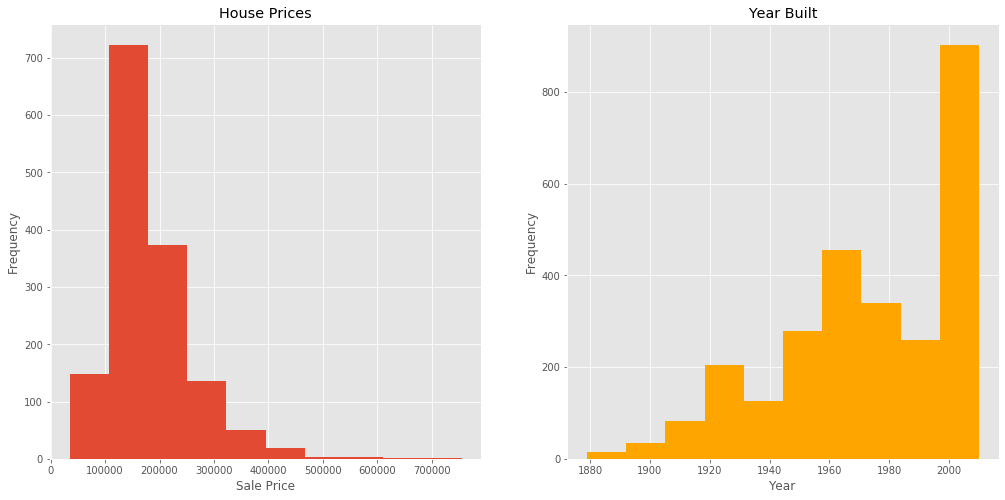

Minimum Sale Price: 34900, Maximum Sale Price: 755000, Average Price: 180921.2


In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,8))
ax0, ax1 = axes.flatten()
n_bins = 10

ax0.hist(price, n_bins, histtype='bar')
ax0.set_title('House Prices')
ax0.set_xlabel('Sale Price')
ax0.set_ylabel('Frequency')

ax1.hist(df['YearBuilt'], n_bins, color='orange')
ax1.set_title('Year Built')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency')

plt.show()

print(f"Minimum Sale Price: {price.min()}, Maximum Sale Price: {price.max()}, Average Price: {round(price.mean(), 2)}")

Scatter plot of year versus sale price

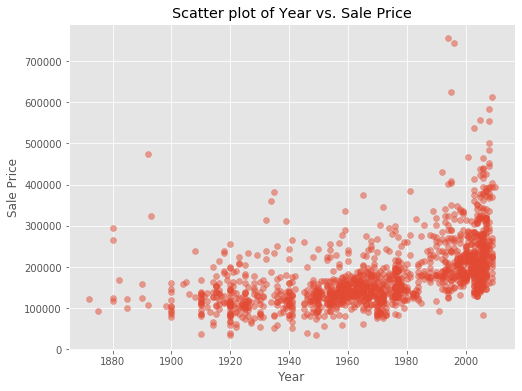

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(train['YearBuilt'], price, alpha=.5)
plt.title('Scatter plot of Year vs. Sale Price')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.show()

Correlation Heatmap

[Text(0.5, 0, 'Id'),
 Text(1.5, 0, 'MSSubClass'),
 Text(2.5, 0, 'LotFrontage'),
 Text(3.5, 0, 'LotArea'),
 Text(4.5, 0, 'OverallQual'),
 Text(5.5, 0, 'OverallCond'),
 Text(6.5, 0, 'YearBuilt'),
 Text(7.5, 0, 'YearRemodAdd'),
 Text(8.5, 0, 'MasVnrArea'),
 Text(9.5, 0, 'BsmtFinSF1'),
 Text(10.5, 0, 'BsmtFinSF2'),
 Text(11.5, 0, 'BsmtUnfSF'),
 Text(12.5, 0, 'TotalBsmtSF'),
 Text(13.5, 0, '1stFlrSF'),
 Text(14.5, 0, '2ndFlrSF'),
 Text(15.5, 0, 'LowQualFinSF'),
 Text(16.5, 0, 'GrLivArea'),
 Text(17.5, 0, 'BsmtFullBath'),
 Text(18.5, 0, 'BsmtHalfBath'),
 Text(19.5, 0, 'FullBath'),
 Text(20.5, 0, 'HalfBath'),
 Text(21.5, 0, 'BedroomAbvGr'),
 Text(22.5, 0, 'KitchenAbvGr'),
 Text(23.5, 0, 'TotRmsAbvGrd'),
 Text(24.5, 0, 'Fireplaces'),
 Text(25.5, 0, 'GarageYrBlt'),
 Text(26.5, 0, 'GarageCars'),
 Text(27.5, 0, 'GarageArea'),
 Text(28.5, 0, 'WoodDeckSF'),
 Text(29.5, 0, 'OpenPorchSF'),
 Text(30.5, 0, 'EnclosedPorch'),
 Text(31.5, 0, '3SsnPorch'),
 Text(32.5, 0, 'ScreenPorch'),
 Text(33.5, 0, 'Poo

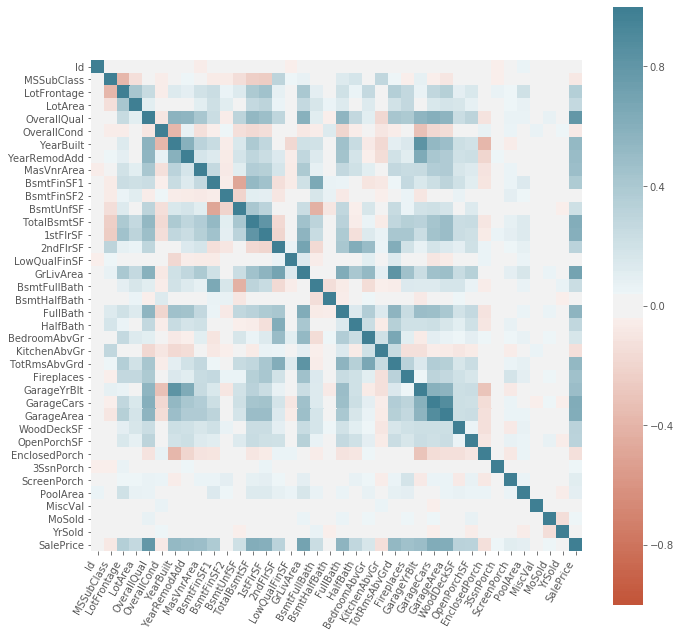

In [0]:
import seaborn as sn

plt.figure(figsize=(11,11))
corr = train.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right'
)

Target Variable Transformations. The 'SalesPrice' column displays a general right skew. Most linear models generalize better when the data they're modeling is normally distributed. To achieve this, boxcox and cube root transformations are applied. The optimal lambda for the boxcox transformation is 0 which applies the log(x) transformation to each value. 

0.1212103673013655
0.6660824155925089


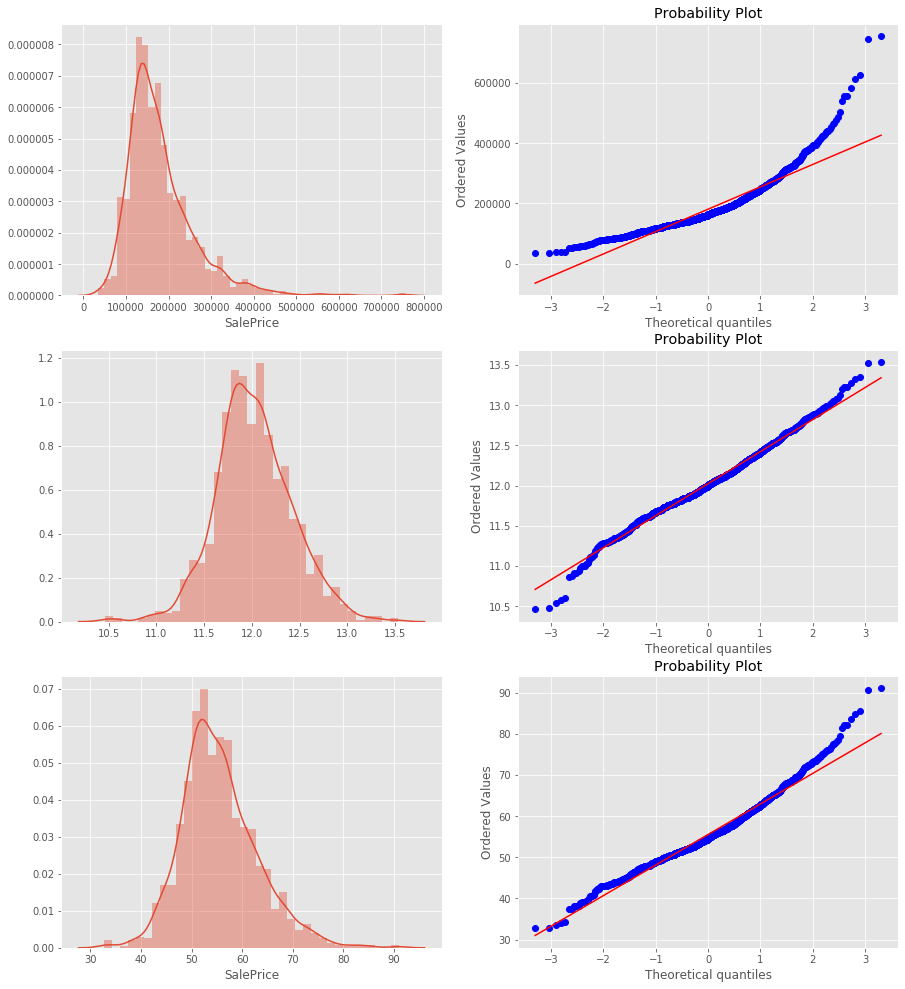

In [0]:
from scipy import stats
from scipy.stats import skew

fig,ax = plt.subplots(ncols=2,nrows=3)
fig.set_size_inches(15,17)

sn.distplot(train['SalePrice'], ax=ax[0][0])
stats.probplot(train['SalePrice'], dist='norm', fit=True, plot=ax[0][1])

sn.distplot(stats.boxcox(train['SalePrice'], 0), ax=ax[1][0])
stats.probplot(stats.boxcox(train['SalePrice'], 0), dist='norm', fit=True, plot=ax[1][1])

sn.distplot(np.cbrt(train['SalePrice']), ax=ax[2][0])
stats.probplot(np.cbrt(train['SalePrice']), dist='norm', fit=True, plot=ax[2][1])

train['log_SalePrice'] = stats.boxcox(train['SalePrice'], 0)

print(abs(skew(stats.boxcox(train['SalePrice'], 0))))
print(abs(skew(np.cbrt(train['SalePrice']))))

## Data Transformations

To make it easy on our models we're going to remove skew from our numeric variables using a log(x) transformation. Also, we're going to normalize our continuous numeric variables to the same scale

In [0]:
num_col = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","GarageArea", "MasVnrArea","TotalBsmtSF", 
           "LotFrontage", "TotalSF", "1stFlrSF", "2ndFlrSF", "EnclosedPorch", "GrLivArea", 
           "LotArea", "OpenPorchSF", "WoodDeckSF", ]
for col in num_col:
    if abs(skew(np.log1p(df[col]))) <= abs(skew(df[col])):
        print(f"{col} transformed, Prev Skew: {round(skew(df[col]), 2)} New Skew: {round(skew(np.log1p(df[col])), 2)}")
        df[col] = np.log1p(df[col])

BsmtFinSF1 transformed, Prev Skew: 1.4 New Skew: -0.76
BsmtFinSF2 transformed, Prev Skew: 4.0 New Skew: 2.35
GarageArea transformed, Prev Skew: 0.84 New Skew: -0.24
MasVnrArea transformed, Prev Skew: 2.51 New Skew: 0.41
TotalBsmtSF transformed, Prev Skew: 1.77 New Skew: -0.39
TotalSF transformed, Prev Skew: 1.56 New Skew: 0.16
1stFlrSF transformed, Prev Skew: 1.43 New Skew: 0.07
2ndFlrSF transformed, Prev Skew: 0.82 New Skew: 0.27
EnclosedPorch transformed, Prev Skew: 4.21 New Skew: 2.05
GrLivArea transformed, Prev Skew: 1.3 New Skew: 0.06
LotArea transformed, Prev Skew: 12.93 New Skew: -0.46
OpenPorchSF transformed, Prev Skew: 2.21 New Skew: -0.11
WoodDeckSF transformed, Prev Skew: 1.79 New Skew: 0.07
